Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_

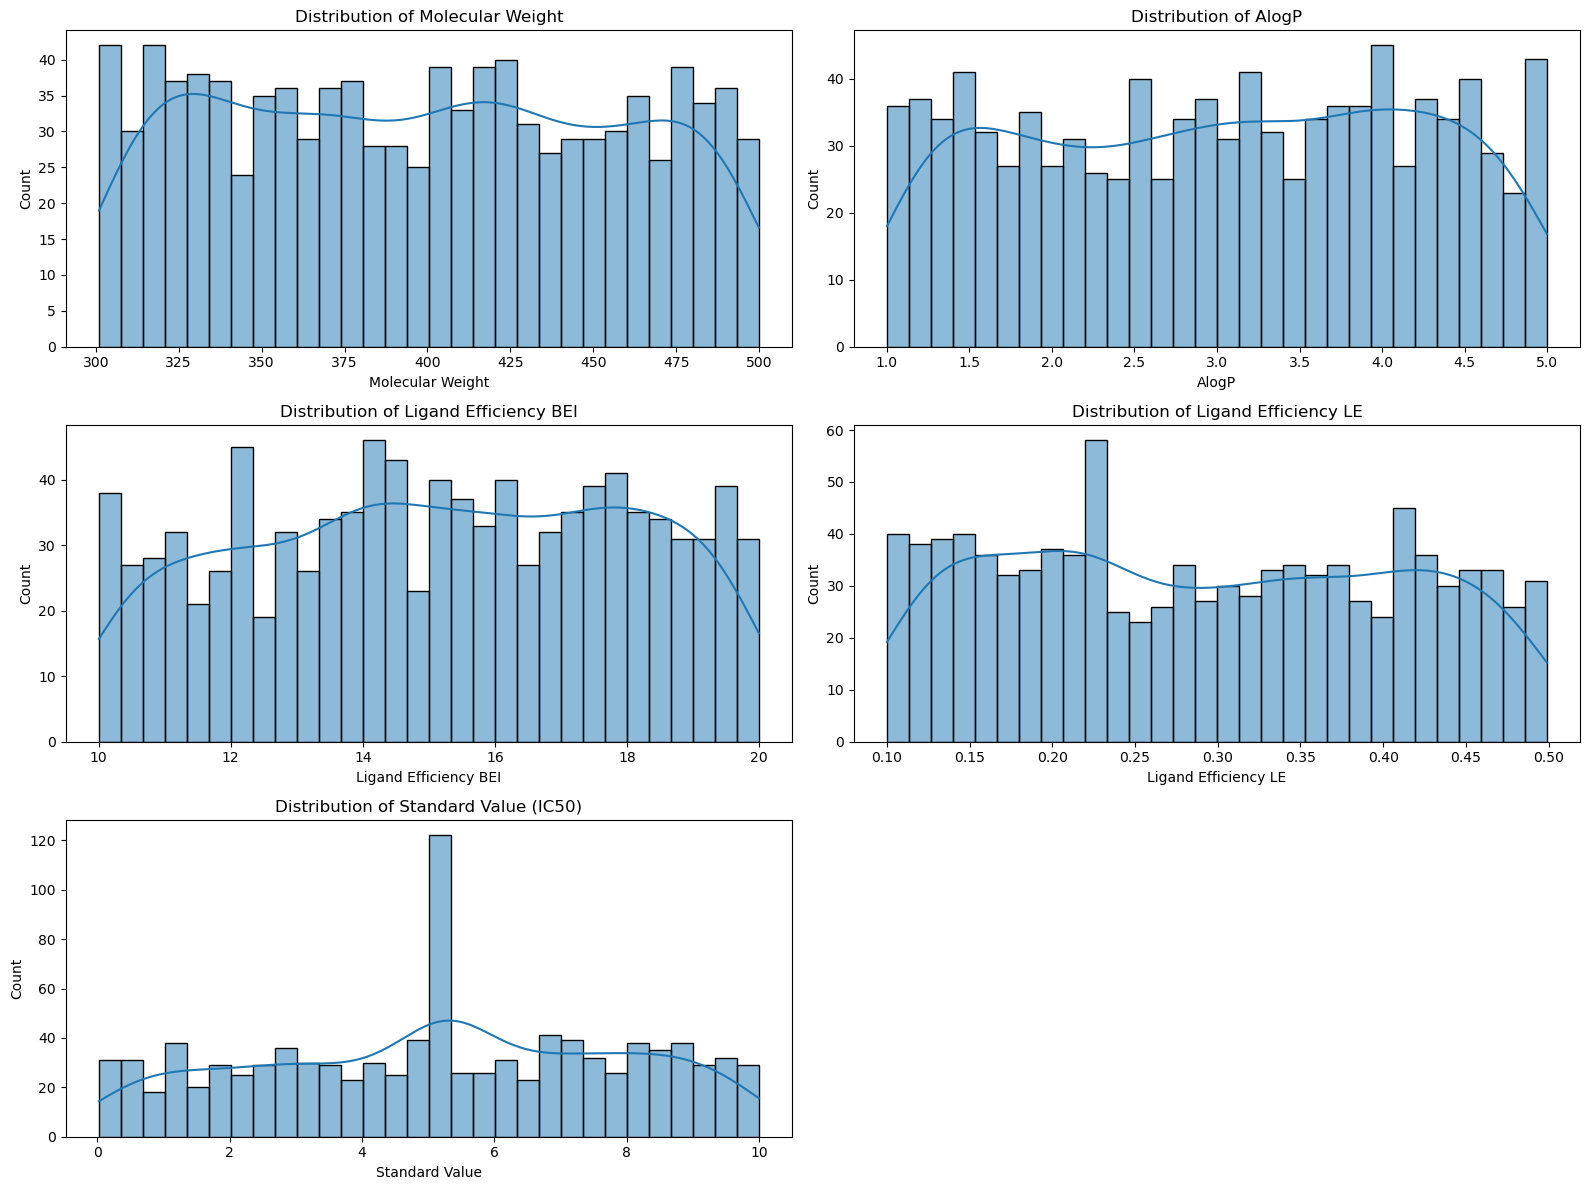

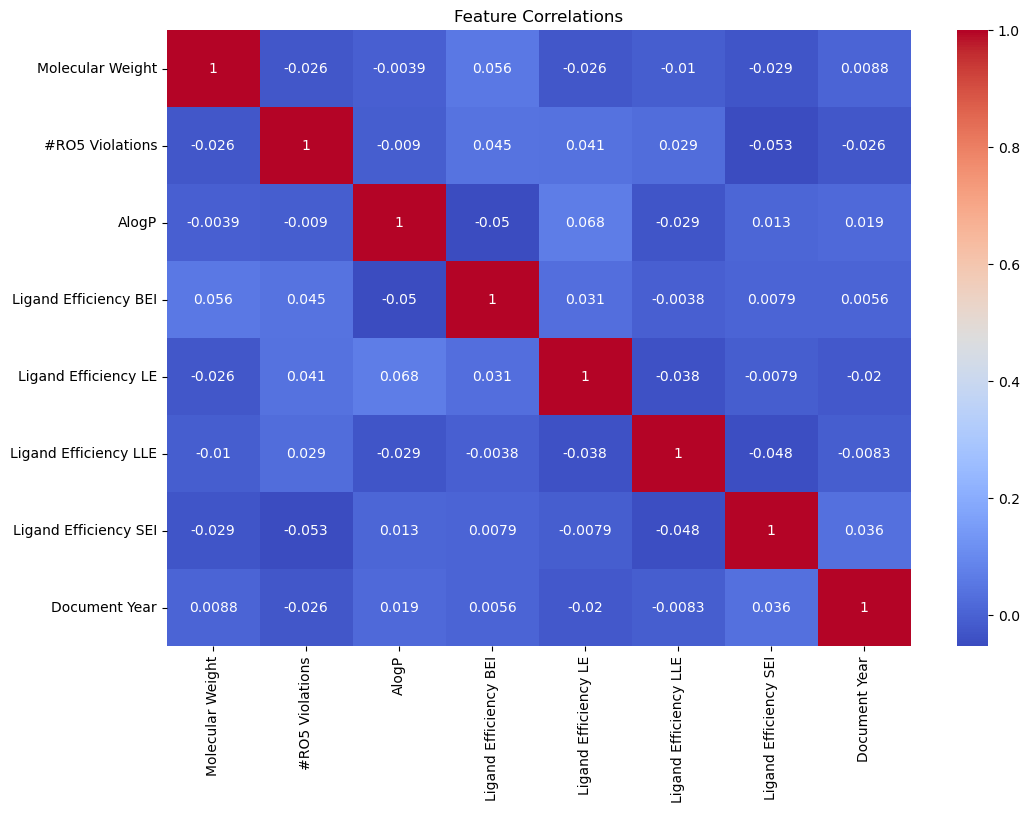

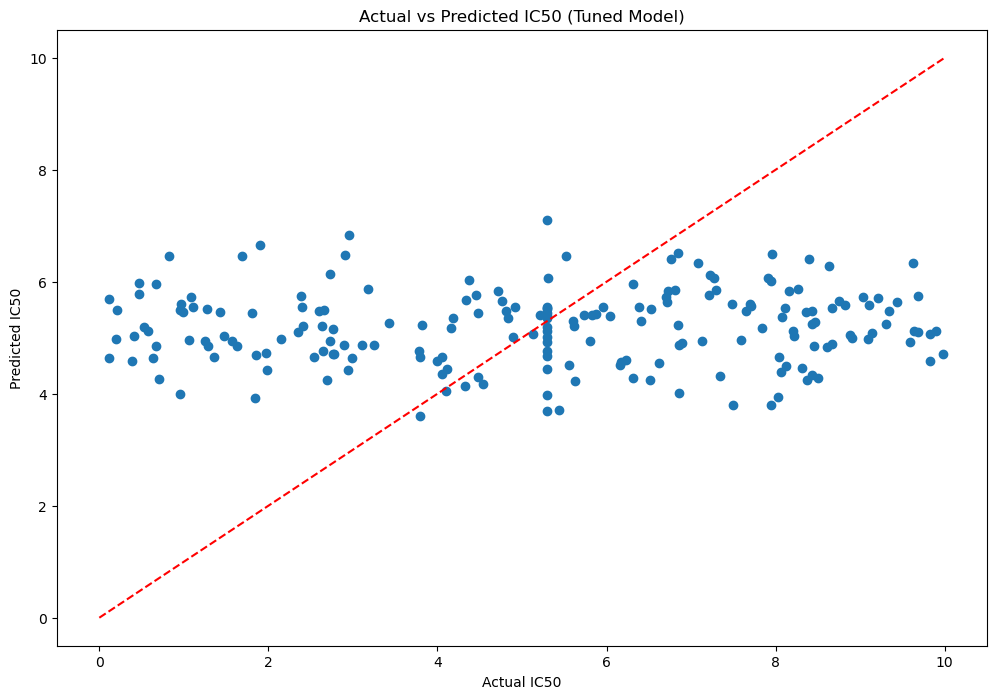

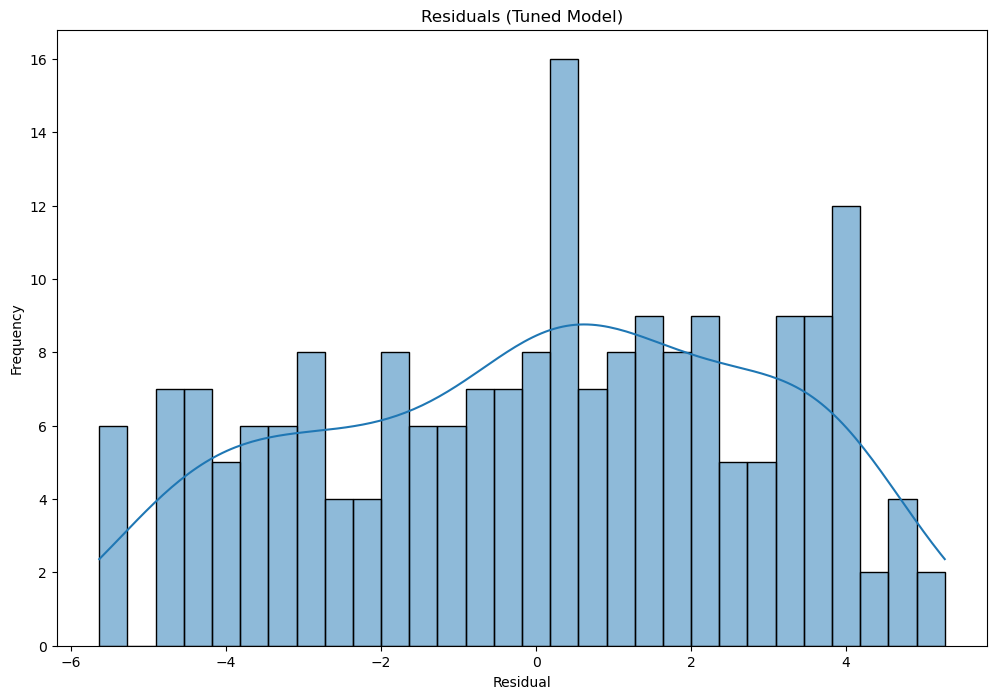

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate sample data
num_samples = 1000
np.random.seed(42)

data = pd.DataFrame({
    'Molecular Weight': np.random.uniform(300, 500, num_samples),
    '#RO5 Violations': np.random.randint(0, 5, num_samples),
    'AlogP': np.random.uniform(1, 5, num_samples),
    'Smiles': ['C[C@H](N)C(=O)O'] * num_samples,  # Simplified example
    'Assay Description': ['Binding assay'] * num_samples,
    'Assay Type': ['Inhibition'] * num_samples,
    'Assay Organism': ['Homo sapiens'] * num_samples,
    'Assay Tissue Name': ['Liver'] * num_samples,
    'Assay Cell Type': ['Hepatocyte'] * num_samples,
    'Ligand Efficiency BEI': np.random.uniform(10, 20, num_samples),
    'Ligand Efficiency LE': np.random.uniform(0.1, 0.5, num_samples),
    'Ligand Efficiency LLE': np.random.uniform(2, 7, num_samples),
    'Ligand Efficiency SEI': np.random.uniform(5, 15, num_samples),
    'Document Year': np.random.randint(2000, 2023, num_samples)
})

# Generate target column
data['Standard Value'] = np.random.uniform(0.01, 10, num_samples)  # IC50 values in µM

# Introduce missing values in synthetic data
data.loc[data.sample(frac=0.1).index, 'Standard Value'] = np.nan

# Fill missing values with the median (or any other strategy)
data['Standard Value'].fillna(data['Standard Value'].median(), inplace=True)

# Select feature columns
feature_columns = ['Molecular Weight', '#RO5 Violations', 'AlogP', 'Ligand Efficiency BEI',
                   'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Document Year']

X = data[feature_columns]
y = data['Standard Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Calculate mean squared error
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error after tuning: {mse_best}")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated MSE: {cv_mse}")



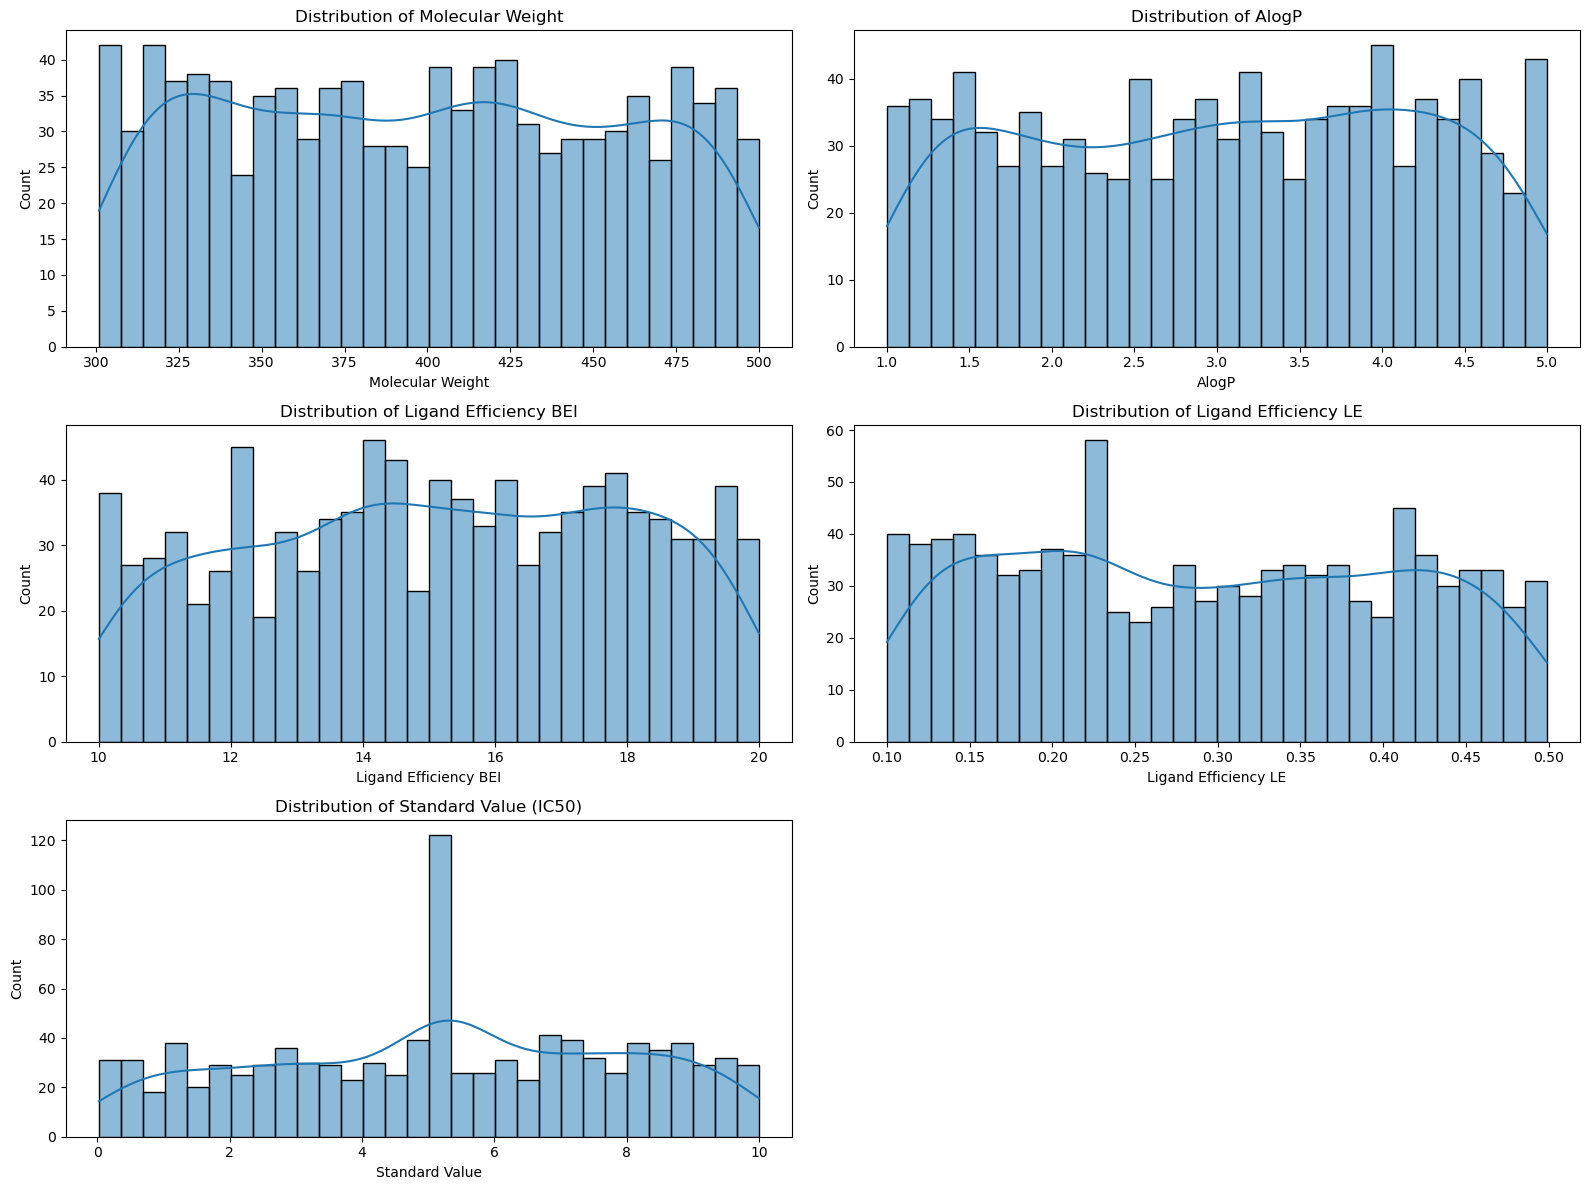

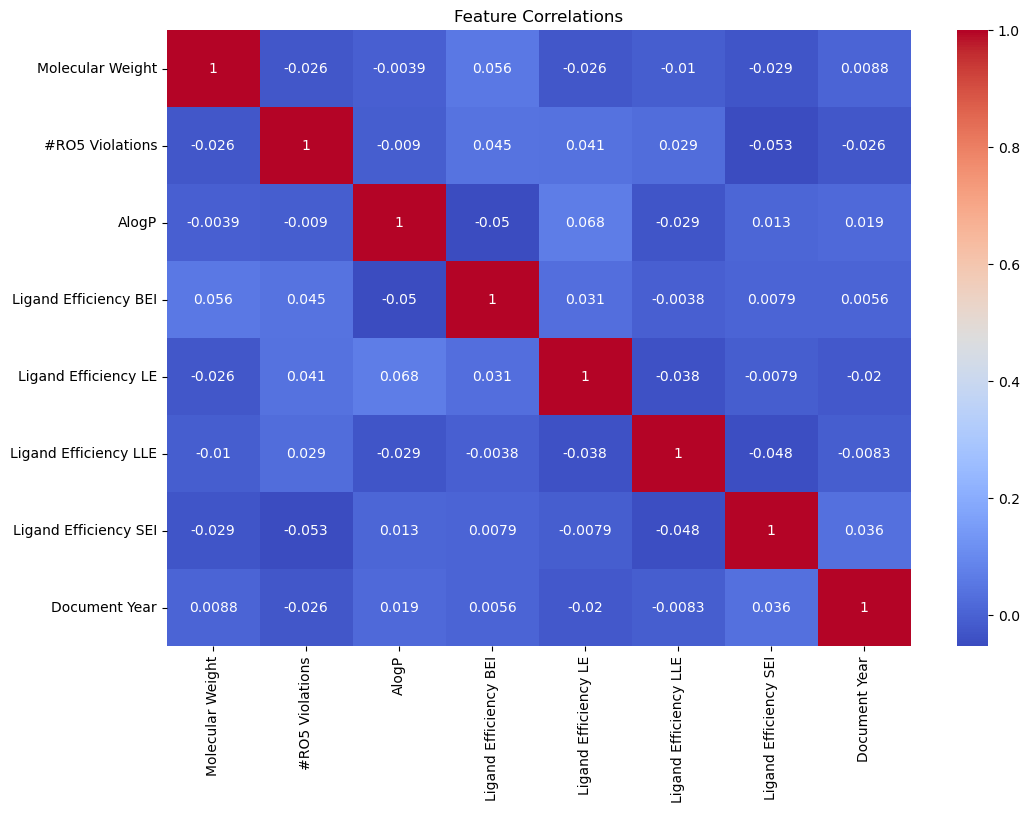

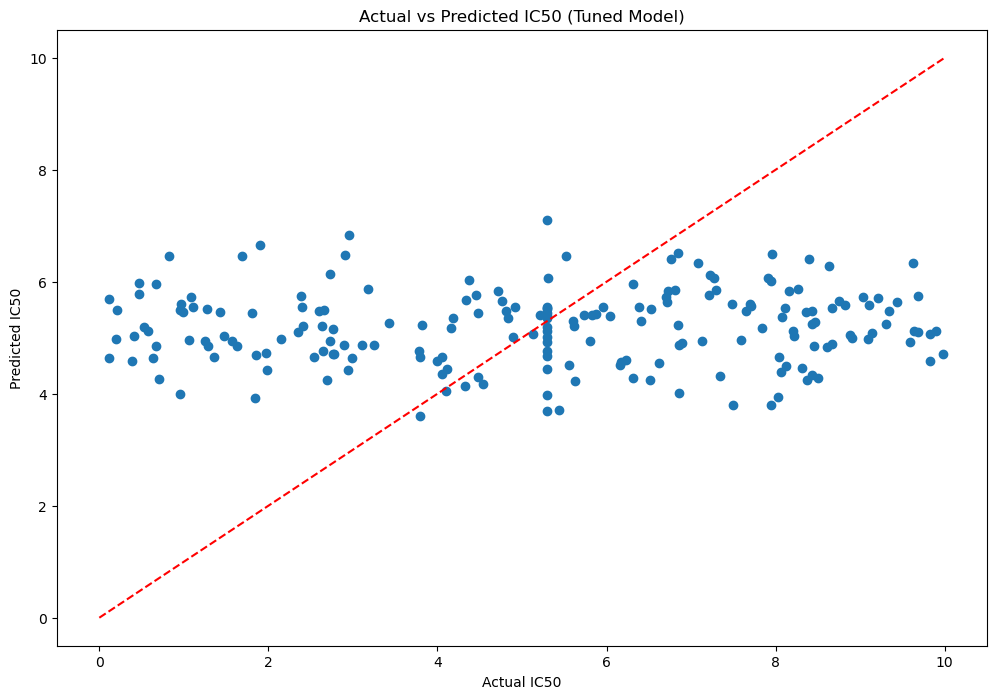

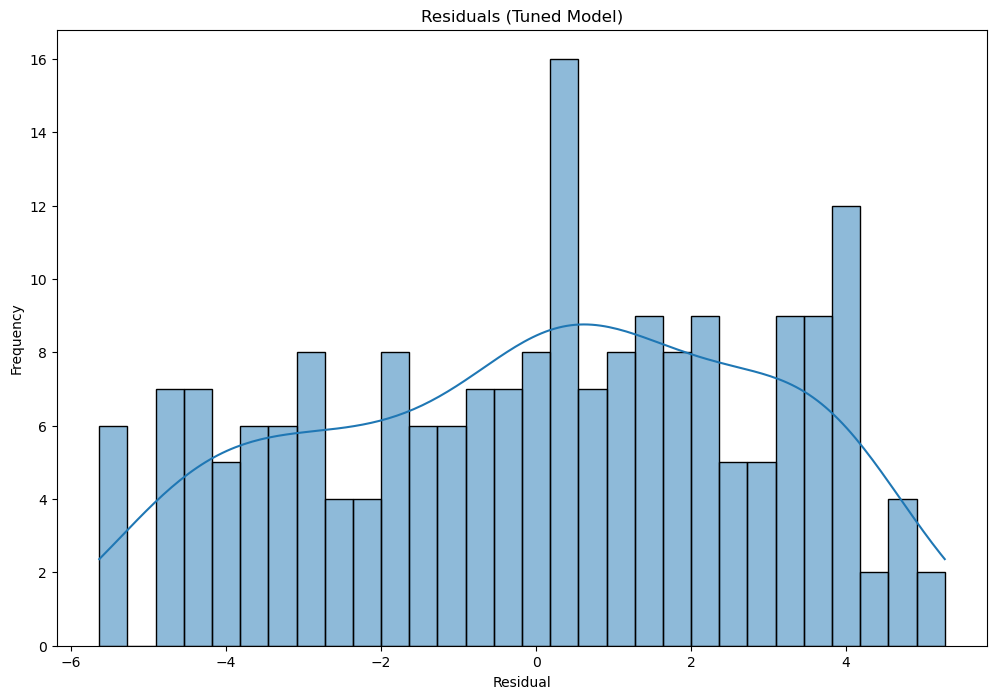

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimato

In [3]:
# Plotting
plt.figure(figsize=(16, 12))

# 1. Distribution of features
plt.subplot(3, 2, 1)
sns.histplot(data['Molecular Weight'], bins=30, kde=True)
plt.title('Distribution of Molecular Weight')

plt.subplot(3, 2, 2)
sns.histplot(data['AlogP'], bins=30, kde=True)
plt.title('Distribution of AlogP')

plt.subplot(3, 2, 3)
sns.histplot(data['Ligand Efficiency BEI'], bins=30, kde=True)
plt.title('Distribution of Ligand Efficiency BEI')

plt.subplot(3, 2, 4)
sns.histplot(data['Ligand Efficiency LE'], bins=30, kde=True)
plt.title('Distribution of Ligand Efficiency LE')

plt.subplot(3, 2, 5)
sns.histplot(data['Standard Value'], bins=30, kde=True)
plt.title('Distribution of Standard Value (IC50)')

plt.tight_layout()
plt.show()

# 2. Feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# 3. Actual vs Predicted
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual IC50')
plt.ylabel('Predicted IC50')
plt.title('Actual vs Predicted IC50 (Tuned Model)')
plt.plot([0, 10], [0, 10], 'r--')
plt.show()

# 4. Residuals
plt.figure(figsize=(12, 8))
residuals_best = y_test - y_pred_best
sns.histplot(residuals_best, bins=30, kde=True)
plt.title('Residuals (Tuned Model)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
